**Segunda Atividade da Disciplina Gerenciamento de Big Data**

**Discente: Valéria Cristina Andrade Rodrigues de Figueredo**



# **1. Baixar os dados**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving season-1819.csv to season-1819.csv


# **2. Pré-Processamento dos dados**

In [3]:
import pandas as pd

# Leitura do CSV
df = pd.read_csv('season-1819.csv')

# Visualizar as primeiras linhas
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [4]:
import pandas as pd

# 1. Converter a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# 2. Criar colunas de Ano, Mês, Dia
df['Ano'] = df['Date'].dt.year
df['Mes'] = df['Date'].dt.month
df['Dia'] = df['Date'].dt.day

# 3. Agrupar por Ano, Mês e Dia e contar partidas
df_datas = df.groupby(['Ano', 'Mes', 'Dia']).size().reset_index(name='Quantidade')

# 4. Ordenar por data (opcional)
df_datas = df_datas.sort_values(['Ano', 'Mes', 'Dia']).reset_index(drop=True)

# Mostrar resultado
df_datas.head(20)


,Ano,Mes,Dia,Quantidade
0,2018,8,10,1
1,2018,8,11,6
2,2018,8,12,3
3,2018,8,18,6
4,2018,8,19,3
5,2018,8,20,1
6,2018,8,25,6
7,2018,8,26,3
8,2018,8,27,1
9,2018,9,1,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       380 non-null    object        
 1   Date      380 non-null    datetime64[ns]
 2   HomeTeam  380 non-null    object        
 3   AwayTeam  380 non-null    object        
 4   FTHG      380 non-null    int64         
 5   FTAG      380 non-null    int64         
 6   FTR       380 non-null    object        
 7   HTHG      380 non-null    int64         
 8   HTAG      380 non-null    int64         
 9   HTR       380 non-null    object        
 10  Referee   380 non-null    object        
 11  HS        380 non-null    int64         
 12  AS        380 non-null    int64         
 13  HST       380 non-null    int64         
 14  AST       380 non-null    int64         
 15  HF        380 non-null    int64         
 16  AF        380 non-null    int64         
 17  HC        380 no

In [6]:
import pandas as pd

# Leitura do CSV
df2 = pd.read_csv('season-1819.csv')
df2


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,2.31,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,2.95,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,...,2.07,19,-0.50,2.13,2.08,1.85,1.80,1.91,3.81,4.15


# **3. Divisão dos dados em pastas**

In [7]:
import pandas as pd
import os

# Converte a coluna 'Date' corretamente (com dia primeiro)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

# Pasta base onde os arquivos serão salvos
base_path = 'arquivos_separados'

# Itera pelas datas únicas do DataFrame
for date in df2['Date'].dt.date.unique():
    ano = date.year
    mes = f"{date.month:02d}"
    dia = f"{date.day:02d}"

    # Cria a pasta correspondente
    pasta_destino = os.path.join(base_path, str(ano), mes, dia)
    os.makedirs(pasta_destino, exist_ok=True)

    # Filtra os dados daquela data
    df_filtrado = df2[df2['Date'].dt.date == date]

    # Define o nome do arquivo
    nome_arquivo = os.path.join(pasta_destino, f"dados_{ano}-{mes}-{dia}.csv")

    # Salva como CSV
    df_filtrado.to_csv(nome_arquivo, index=False)

print("Arquivos separados por ano/mês/dia com sucesso.")


Arquivos separados por ano/mês/dia com sucesso.


In [8]:
import shutil

# Compacta a pasta em um arquivo .zip
shutil.make_archive("arquivos_separados", 'zip', "arquivos_separados")

'/content/arquivos_separados.zip'

In [9]:
from google.colab import files

# Baixa o arquivo .zip para o seu computador
files.download("arquivos_separados.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **4. Armazenamento no S3**

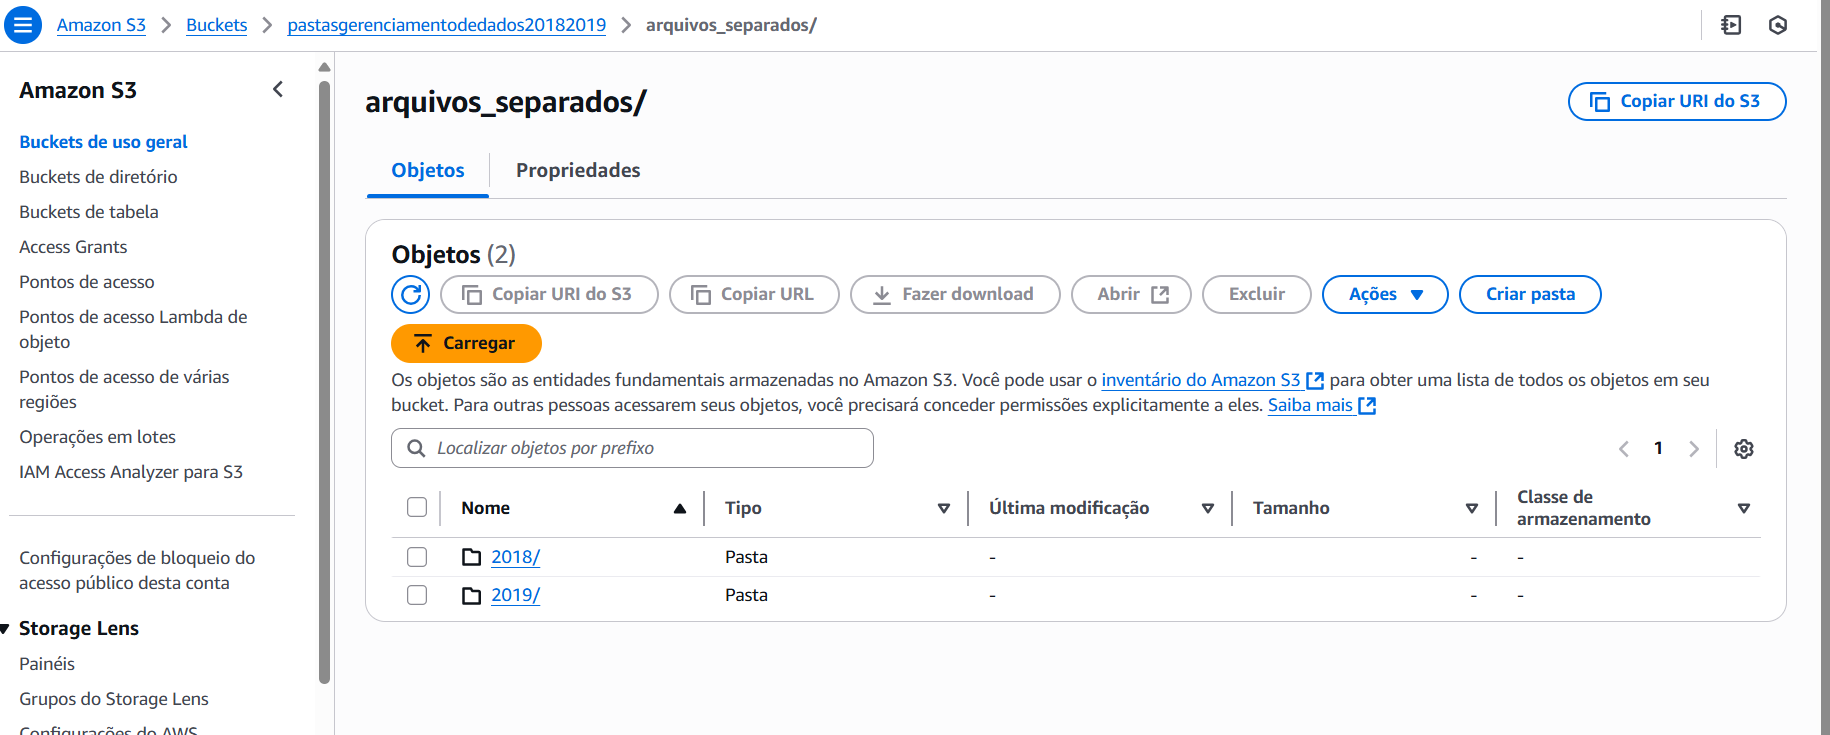

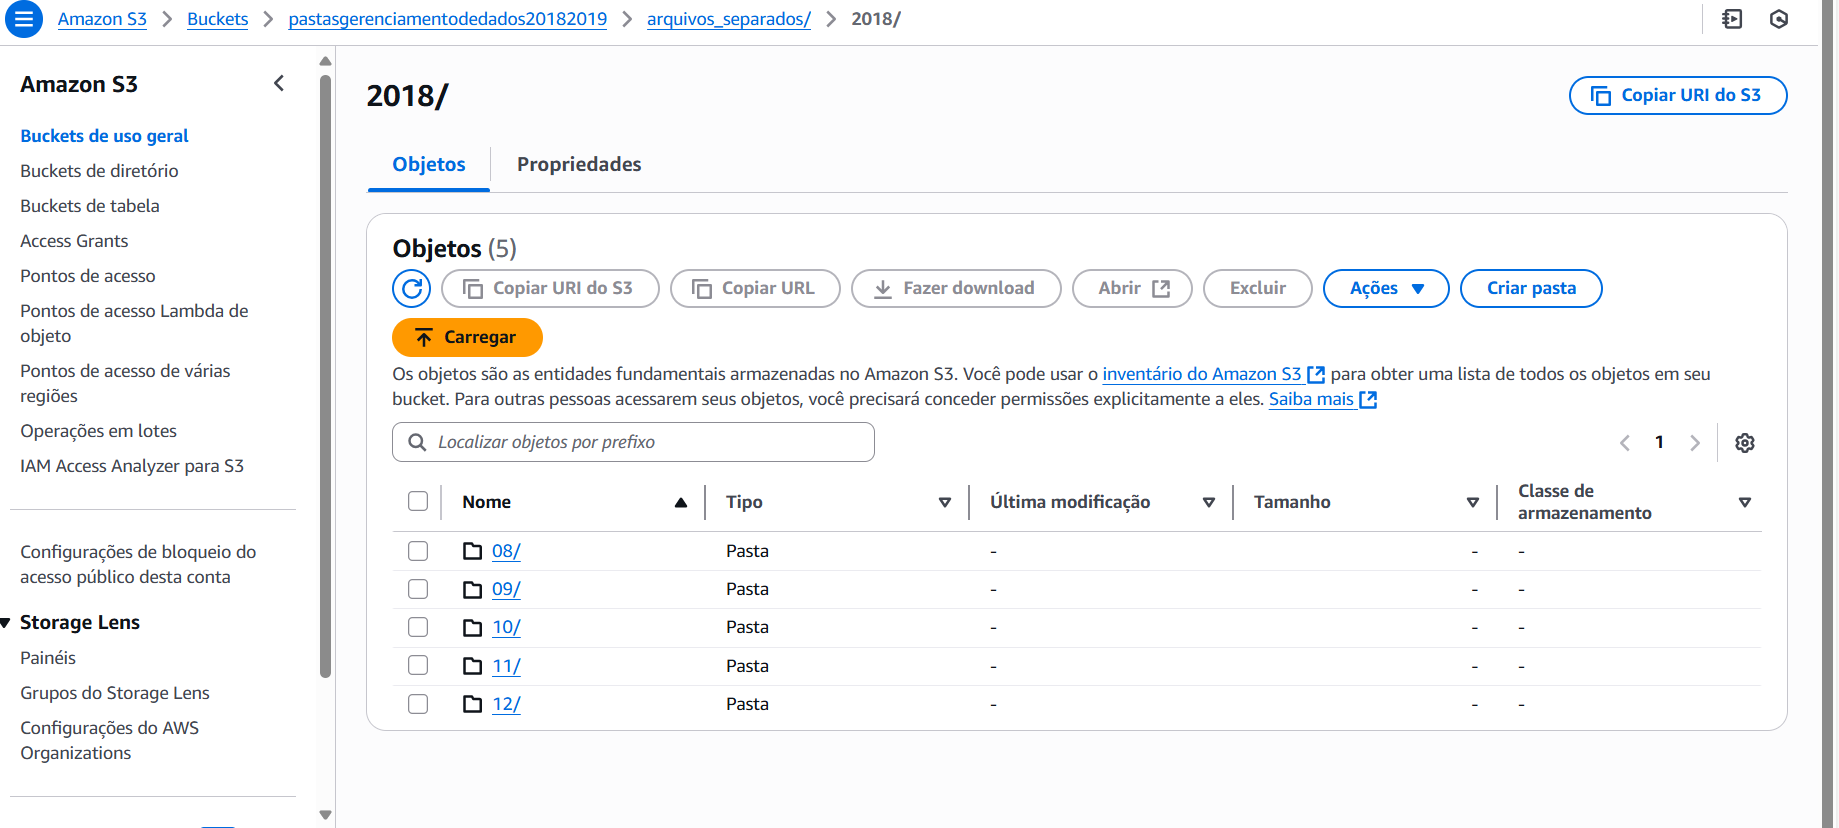

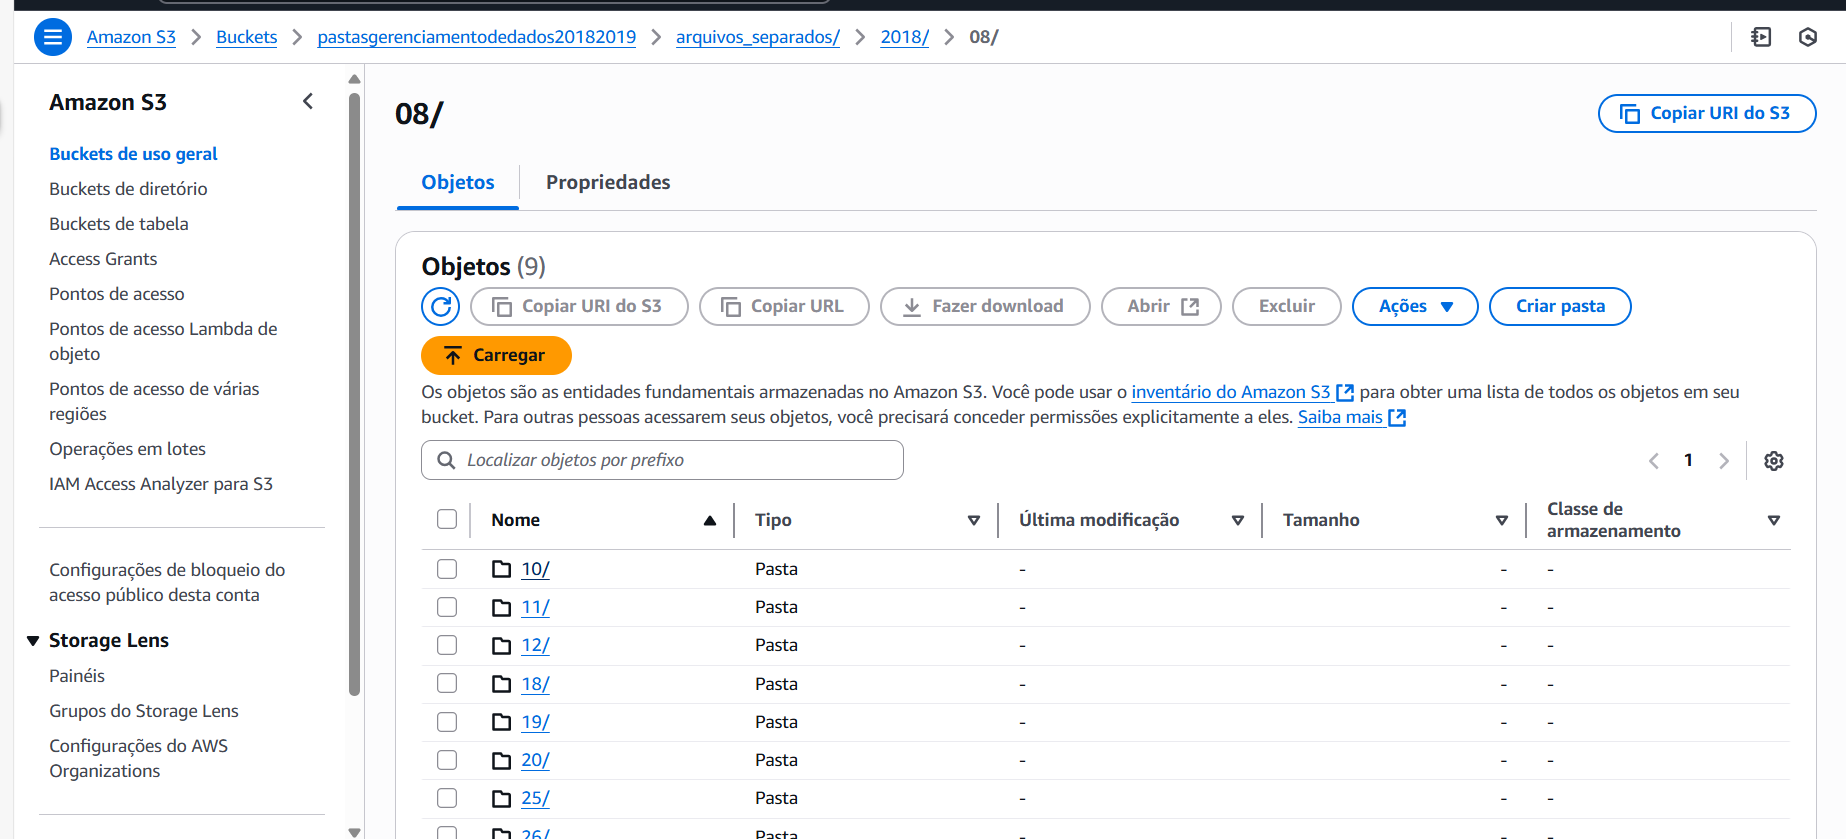

# **5. Crawler**

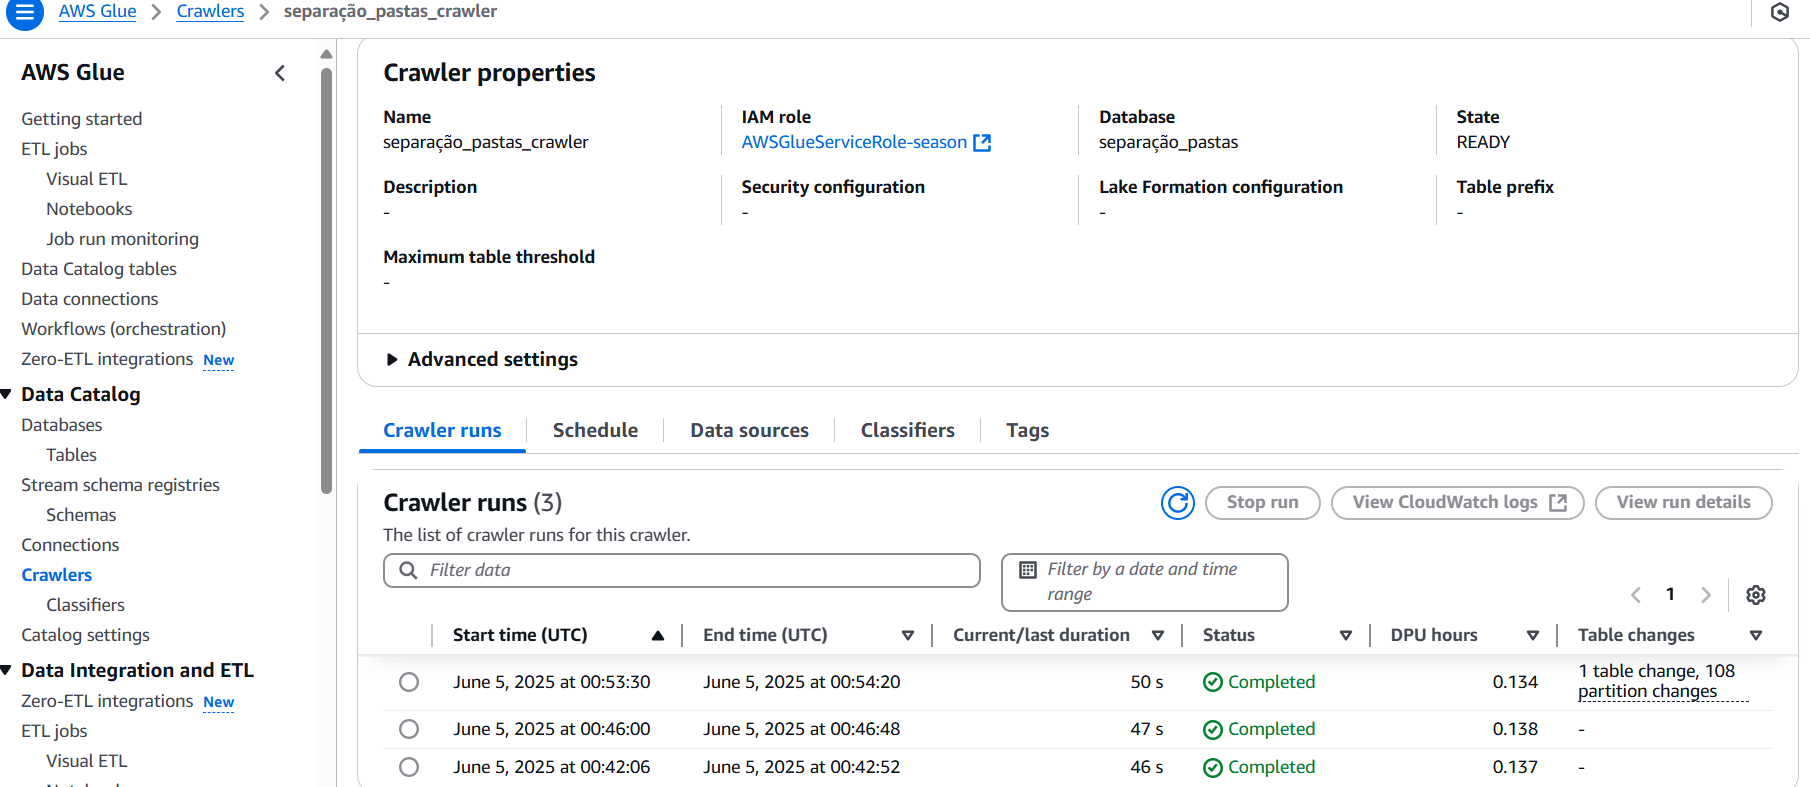

# **6.Athena**

**1. Determinar o time de "casa" e seus gols na data 10-08-2018**

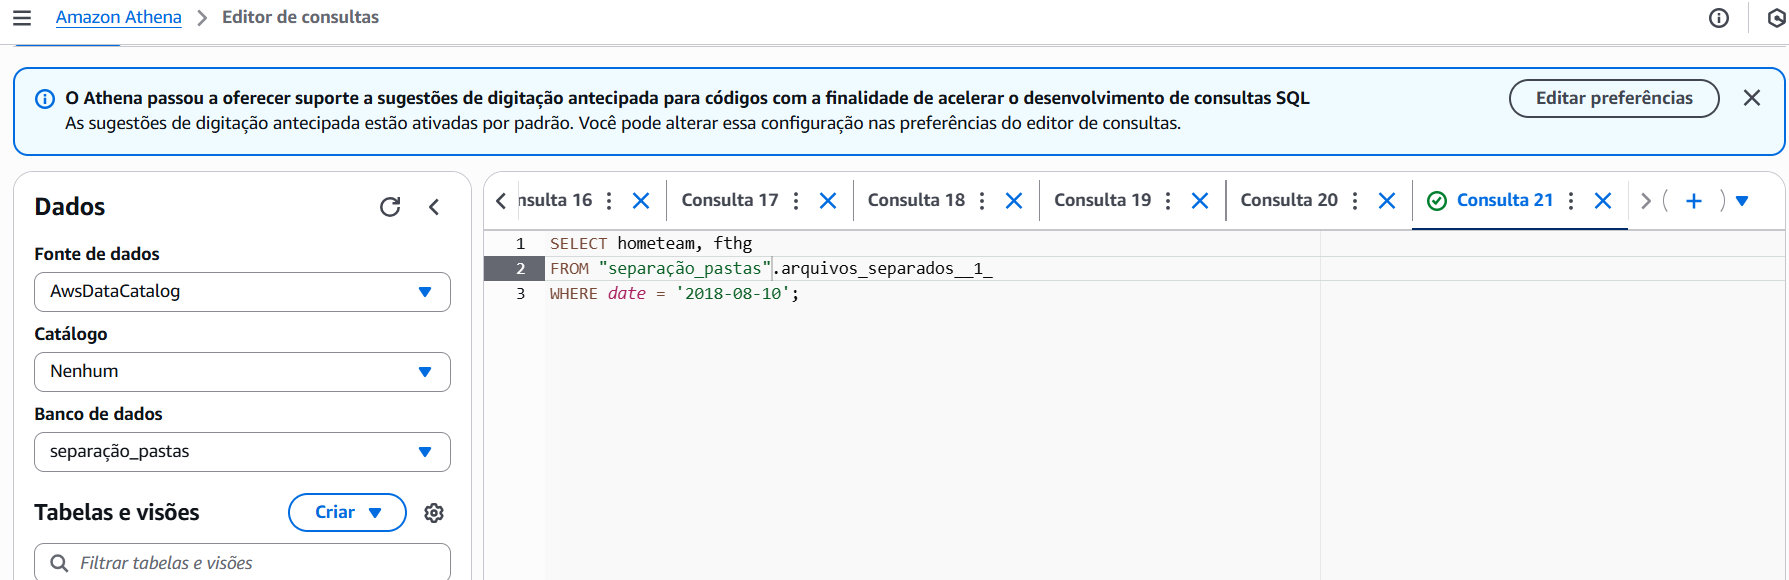

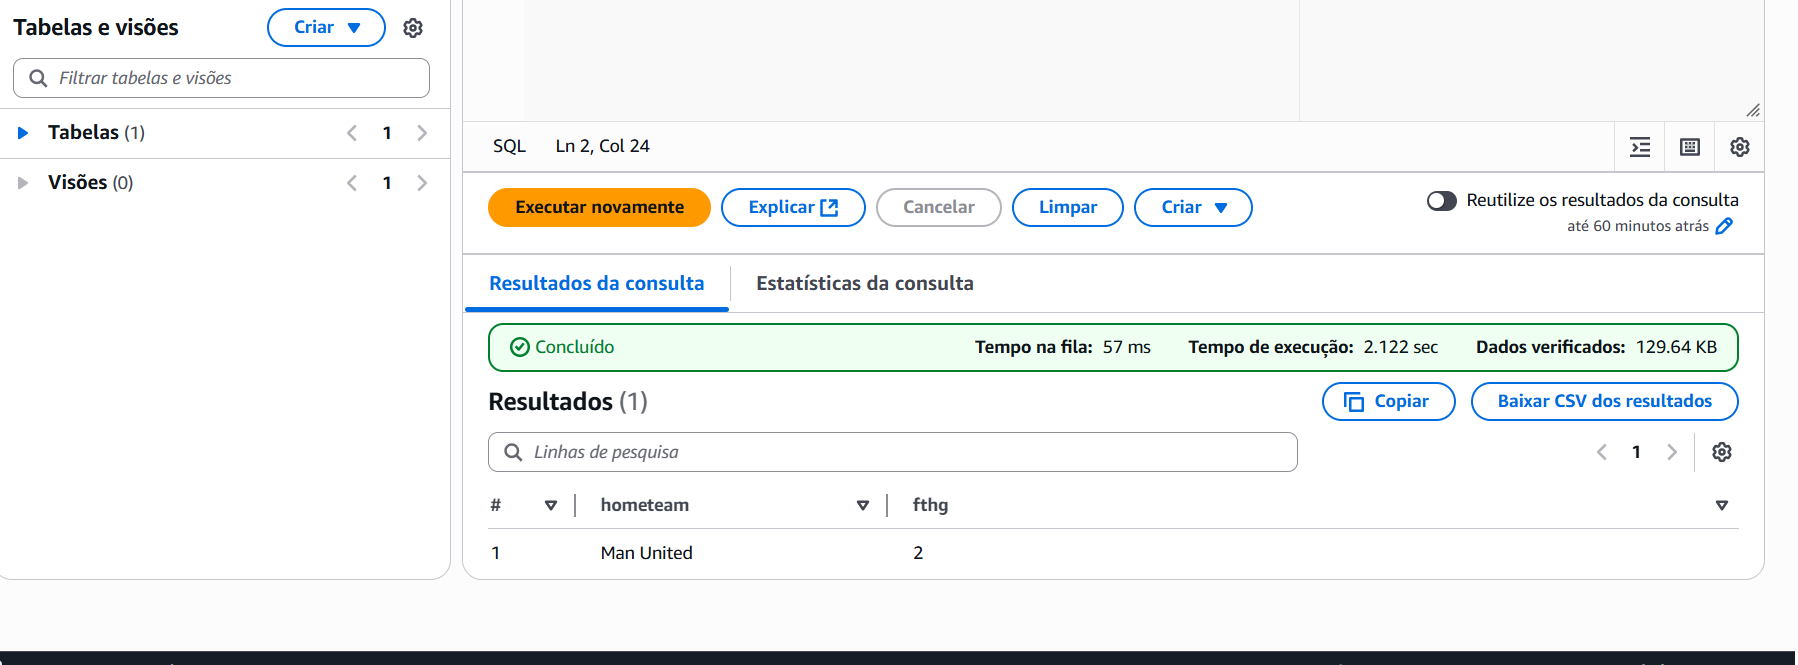